In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import functools 
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/vagrant/data-science-from-scratch/code/')
import working_with_data as wwd
import lecture12


In [3]:
data = lecture12.load_ad_data()

In [4]:
tv = wwd.pluck('TV', data)
sales = wwd.pluck('Sales', data)

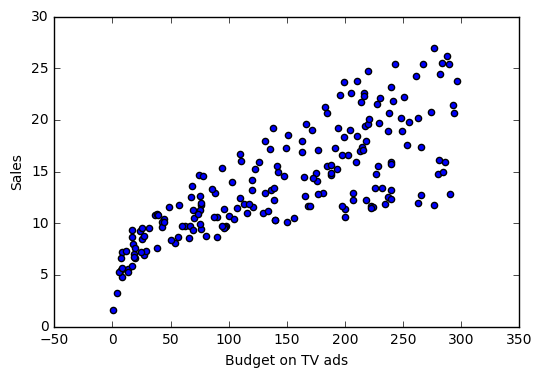

In [5]:
plt.scatter(tv, sales)
plt.xlabel('Budget on TV ads')
plt.ylabel('Sales')

In [6]:
def predict(beta0, beta1, x_i):
    return beta1 * x_i + beta0

def error(beta0, beta1, x_i, y_i):
    return y_i - predict(beta0, beta1, x_i)

def sum_of_squared_errors(beta0, beta1, x, y):
    return sum(error(beta0, beta1, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

def make_cost_function(x, y):
    """Returns sum_of_squared_errors as a function of betas, x and y are fixed."""
    return functools.partial(sum_of_squared_errors, x=x, y=y)

In [7]:
J = make_cost_function(tv, sales)

The cost of this line is 8653.25


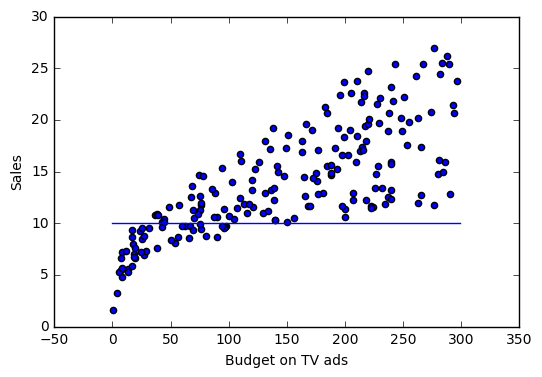

In [8]:
# let's try some examples...  what is a good guess for beta0 and beta1 
# that will fit above data well?
beta0 = 10
beta1 = 0
plt.scatter(tv, sales)
plt.xlabel('Budget on TV ads')
plt.ylabel('Sales')
plt.plot(range(0, 300), [predict(beta0, beta1, x) for x in range(300)])
print "The cost of this line is", J(beta0, beta1)

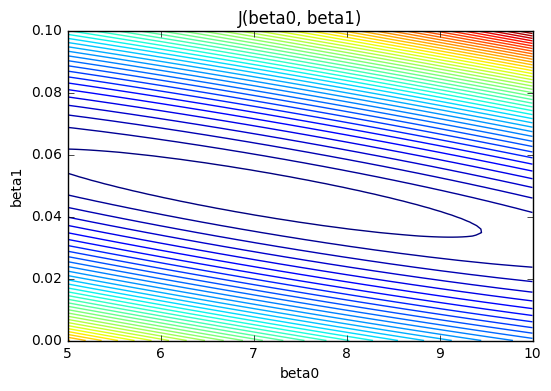

In [9]:
lecture12.make_contour_plot(J)

In [10]:
# the cost function is minimized right around...
J(7.03, 0.0475)

2102.5452924375004

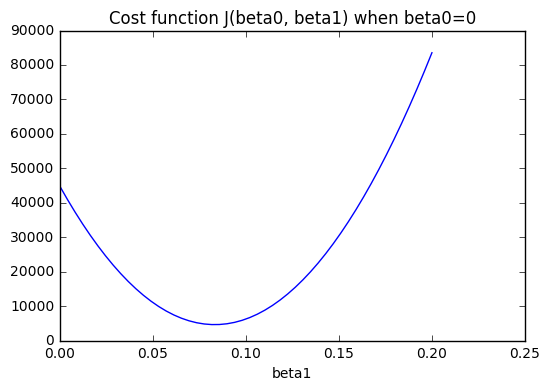

In [11]:
beta1 = np.linspace(0.0, 0.20)
js = [J(0, b1) for b1 in beta1]
plt.plot(beta1, js)
plt.title('Cost function J(beta0, beta1) when beta0=0')
plt.xlabel('beta1')

In [12]:
import gradient_descent as gd

In [40]:
lecture12.gradient_on_data((0, 0), tv, sales)

(-5609.000000000001, -964216.6799999998)

In [41]:
gradient_fn = lecture12.make_gradient(tv, sales)
gradient_fn((0,0))
gradient_fn((-427260.00000000006, -78217699.70000002))

(-4600701352863.899, -905961049427972.4)

In [42]:
gd.minimize_batch(J, gradient_fn, theta_0=(10,0.1))

(10, 0.1)
[-427260.00000000006, -78217699.70000002]


In [20]:
lecture12.gradient_on_data(0, 0, tv, sales)

TypeError: gradient_on_data() takes exactly 3 arguments (4 given)